# Анализ рынка продаж видеоигр
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). **Нам нужно выявить определяющие успешность игры закономерности.** Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

На основе этих данных требуется проверить следующие **гипотезы**:
- 1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- 2.Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**План проекта**
- Изучить данные
- Провести предобработку данных
- Провести исследовательский анализ данных:
 - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 - Не учитывайте в работе данные за предыдущие годы.
 - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
 - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
 - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
 - Соотнесите выводы с продажами игр на других платформах.
 - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
- Составить портрет пользователя каждого региона
- Проверить гипотезы

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from scipy import stats as st
from plotly import graph_objects as go
from IPython.display import set_matplotlib_formats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# игнорируем предупреждения
warnings.filterwarnings(action='ignore')

# выставляем ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.3f}'.format

# снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

#ставим ограничение на показ максимума строк, равное 100
pd.options.display.max_rows = 100

# задаем размер графика
sns.set(rc={'figure.figsize':(14,7)})

In [3]:
games = pd.read_csv('/datasets/games.csv')

In [4]:
display(games.head())
games.info()
games.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.000",Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,"1,985.000",Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.000",Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,"2,009.000",Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.000",Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.000","16,715.000","16,715.000","16,715.000","16,715.000","8,137.000"
mean,"2,006.485",0.263,0.145,0.078,0.047,68.968
std,5.877,0.814,0.503,0.309,0.187,13.938
min,"1,980.000",0.000,0.000,0.000,0.000,13.000
25%,"2,003.000",0.000,0.000,0.000,0.000,60.000
50%,"2,007.000",0.080,0.020,0.000,0.010,71.000
75%,"2,010.000",0.240,0.110,0.040,0.030,79.000
max,"2,016.000",41.360,28.960,10.220,10.570,98.000


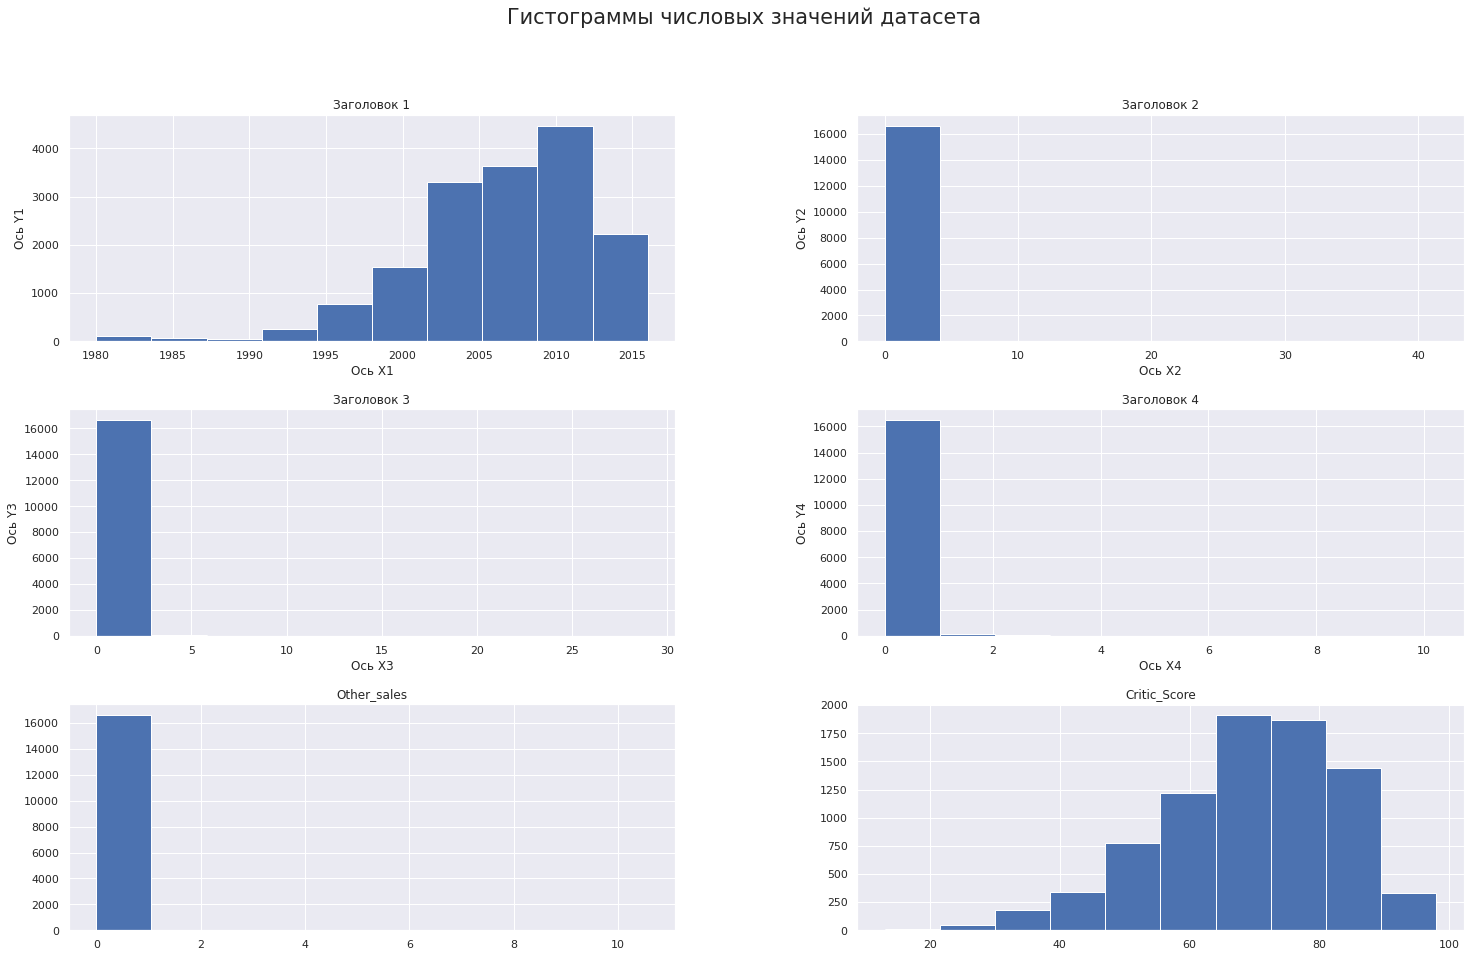

In [5]:

axes = games.hist(figsize = (25,15))
axes[0,0].set_title('Заголовок 1')
axes[0,0].set_xlabel('Ось Х1')
axes[0,0].set_ylabel('Ось Y1')

axes[0,1].set_title('Заголовок 2')
axes[0,1].set_xlabel('Ось Х2')
axes[0,1].set_ylabel('Ось Y2')

axes[1,0].set_title('Заголовок 3')
axes[1,0].set_xlabel('Ось Х3')
axes[1,0].set_ylabel('Ось Y3')

axes[1,1].set_title('Заголовок 4')
axes[1,1].set_xlabel('Ось Х4')
axes[1,1].set_ylabel('Ось Y4')
# И так далее по всем гистограммам

plt.suptitle('Гистограммы числовых значений датасета', ha='center', fontsize='xx-large')
plt.show()

**Описание данных.**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- Наименования столбцов не соответствуют змеиному регистру;
- Неправильный тип данных у столбцов Year_of_Release и User_Score.

### Предобработка данных

In [6]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.000",Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,"1,985.000",Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.000",Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,"2,009.000",Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.000",Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.000",Action,0.000,0.000,0.010,0.000,NaN,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.000",Sports,0.000,0.010,0.000,0.000,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,"2,016.000",Adventure,0.000,0.000,0.010,0.000,NaN,NaN,NaN
16713,Spirits & Spells,GBA,"2,003.000",Platform,0.010,0.000,0.000,0.000,NaN,NaN,NaN


#### Заменим названия столбцов.

In [7]:
games.columns = map(str.lower, games.columns) #привожу к нижнему регистру названия столбцов

#### Обработаем пропуски.

In [8]:
games.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [9]:
games.isna().mean().sort_values(ascending=False)

critic_score      0.513
rating            0.405
user_score        0.401
year_of_release   0.016
name              0.000
genre             0.000
platform          0.000
na_sales          0.000
eu_sales          0.000
jp_sales          0.000
other_sales       0.000
dtype: float64

**Больше всего пропусков в столбцах: critic_score, rating и user_score. Природа пропуска столбца rating скорее всего связана с тем, что рейтинг ESRB предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. То есть, в данном случае пропуск имеет признак, что игра выпущена не в Северо-Американском регионе. В critic_score и user_score вряд ли случайна, скорее всего их забыли, или не захотели указать. Пропуски в year_of_release, name, genre могли появиться в результате сбоя или человеческого фактора при заполнении.
Заполнить эти пропуски медианным или средним значениями будет неправильно, так как это сильно исказит данные для дальнейшего исследования, удалить эти строки тоже будет не совсем верно, так как это большой процент данных.
Удалю строки с пропусками в year_of_release, name, genre, так как их менее 2% от всех данных.**

In [10]:
games = games.dropna(subset=['year_of_release','name','genre'])

**To Be Determined или To Be Decided от английского, по сути пропуски.**

In [11]:
pd.options.mode.chained_assignment = None #отключаю предупреждение
games['user_score'] = games['user_score'].replace('tbd', np.nan)#меняю tbd на Nan

**Поменяю тип данных на int и float у 2 столбцов, на которые обратили внимание раньше.**

In [12]:
games['year_of_release'] = games['year_of_release'].astype('int')
games['user_score'] = games['user_score'].astype('float')

####  Заполним пропущенные значения рейтингов, как unknown, там где мало значений - объединим.

In [13]:
games['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

**Рейтинг ESRB:**
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- «К-A» - Kids to Adults - старое название рейтинга Everyone, с ним и объединим

In [14]:
games['rating'] = games['rating'].fillna('unknown')
games['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

In [15]:
games.loc[games['rating'] == 'AO', 'rating'] = 'M'
games.loc[games['rating'] == 'RP', 'rating'] = 'unknown'
games.loc[games['rating'].isin(['EC', 'K-A']), 'rating'] = 'E'
games['rating'].value_counts()

unknown    6677
E          3932
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

#### Проверим на неявные дубликаты строк, совпадающих по столбцам 'name', 'platform', 'years_of_release'.

In [16]:
game_dups = games.loc[:, 'name':'year_of_release']
game_dups[game_dups.duplicated()]

,name,platform,year_of_release
16230,Madden NFL 13,PS3,2012


In [17]:
len(games)

16444

In [18]:
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first').reset_index(drop=True)

In [19]:
len(games)

16443

#### Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [20]:
games['sum_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.360,28.960,3.770,8.450,76.000,8.000,E,82.540
1,Super Mario Bros.,NES,1985,Platform,29.080,3.580,6.810,0.770,NaN,NaN,unknown,40.240
2,Mario Kart Wii,Wii,2008,Racing,15.680,12.760,3.790,3.290,82.000,8.300,E,35.520
3,Wii Sports Resort,Wii,2009,Sports,15.610,10.930,3.280,2.950,80.000,8.000,E,32.770
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,unknown,31.380
...,...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
16439,LMA Manager 2007,X360,2006,Sports,0.000,0.010,0.000,0.000,NaN,NaN,unknown,0.010
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
16441,Spirits & Spells,GBA,2003,Platform,0.010,0.000,0.000,0.000,NaN,NaN,unknown,0.010


**Вывод.**
- Убрал пропуски, где это было возможно, описал возможные причины;
- Проверил на дубликаты;
- Привёл столбцы  'year_of_release' к типу 'int'  и 'user_score' к типу 'float';
- Заполнил пропущенные значения рейтингов, как unknown, там где было мало значений - объединил;
- Добавил новый столбец с суммой продаж для всех регионов.

In [21]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  sum_sales        16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Проведите исследовательский анализ данных

####  Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [22]:
games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

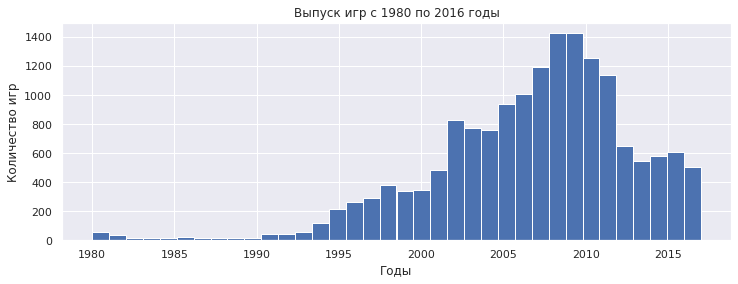

In [23]:
games.plot(y='year_of_release', x='sum_sales', 
           kind='hist', 
           bins=36, 
           grid=True, 
           figsize=(12, 4), 
           range=(1980, 2017),
           legend=False)
plt.title('Выпуск игр с 1980 по 2016 годы')
plt.xlabel('Годы')
plt.ylabel('Количество игр');

**Исходя из полученных данных, выпуск игр начался с 1980 года, далее видим рост продаж в середине 90-х годов. Связываю это с развитием технологий и ростом доступности для пользователей. После 2000 года наблюдается резкий рост, это также связываю с развитием технологической отрасли. Пик приходится на 2008-2009 годы, спад после 2010 года связываю с последствиями кризиса, после которого компании потеряли в финансировании и в качественных кадрах. После кризиса снова видим рост к 2015 году, компании, по-видимому, оправились от последствий и нарастили производство.**

#### Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

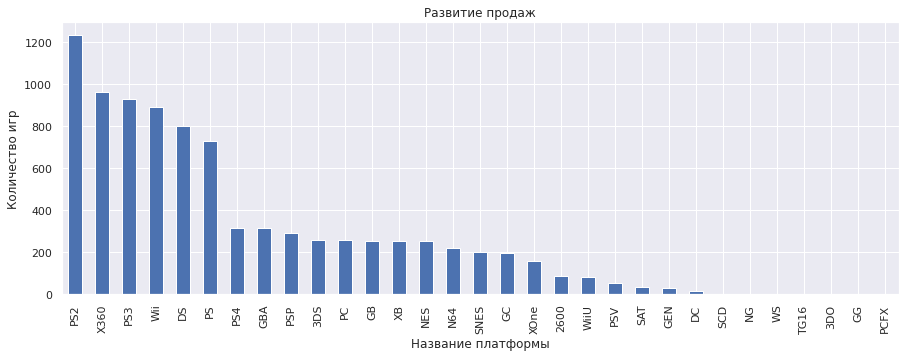

In [24]:
platform_sales = games.pivot_table(index='platform',
                                   values='sum_sales',
                                   aggfunc='sum')\
                                   .sort_values(ascending=False, by = 'sum_sales')
platform_sales.plot(kind='bar',
                    figsize=(15, 5),
                    legend=False,
                    grid = True,)
plt.title('Развитие продаж')
plt.xlabel('Название платформы')
plt.ylabel('Количество игр');

**На графике видим, что лидерами продаж являются все версии PlayStation, xbox 360 от Microsoft, консоли Nintendo - DS и Wii. Далее выберем ТОП-6 платформ по продажам и построим распределение по годам, для понимания, за какой характерный срок появляются новые и исчезают старые платформы.**

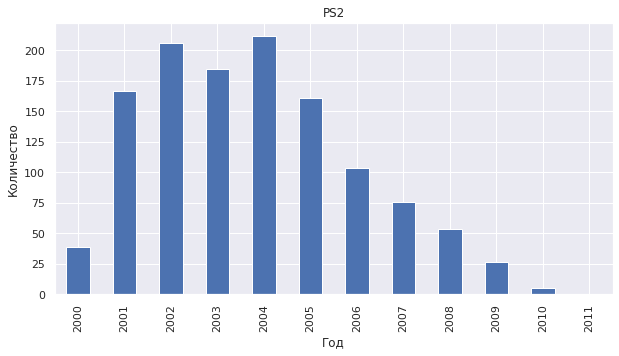

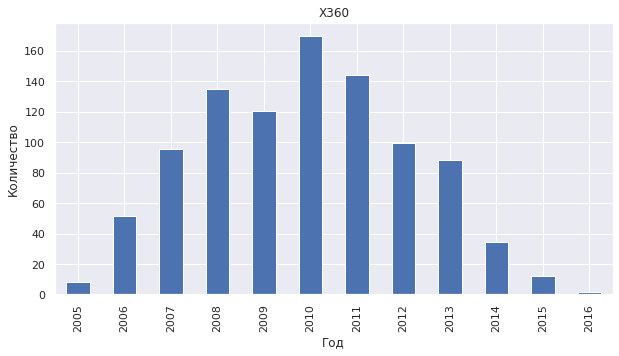

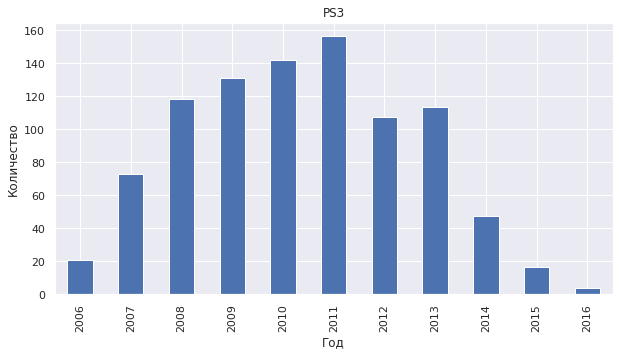

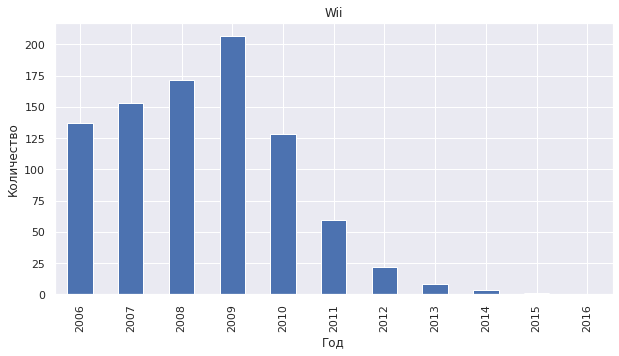

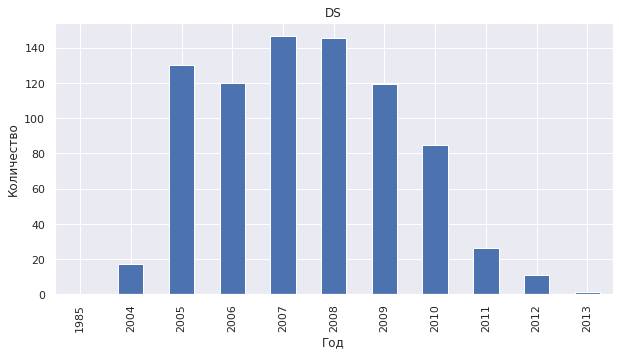

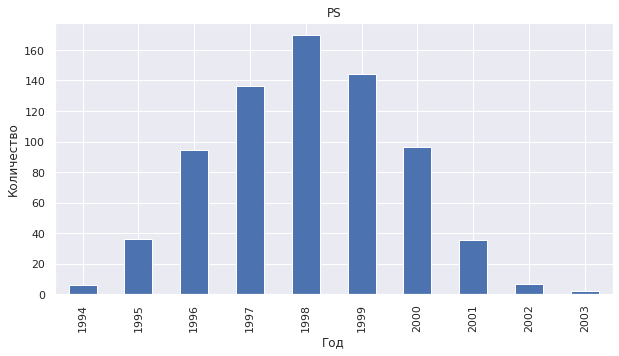

In [25]:
for top in platform_sales.index[:6]:
    games.query('platform == @top')\
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')\
    .plot(kind='bar',
          figsize=(10, 5),
          legend=False,
          grid = True)
    plt.xlabel('Год')
    plt.ylabel('Количество')
    plt.title(top)
    plt.show()

**Вывод. Лидерами продаж являются все версии PlayStation, Xbox 360 от Microsoft, консоли Nintendo - DS и Wii. Далее выберем ТОП-6 платформ по продажам и построим распределение по годам, для понимания, за какой характерный срок появляются новые и исчезают старые платформы.По графикам видим, что средний срок жизни платформы на рынке близок к 10 годам. Расчёт медианного значения по всем платформам даёт число 7. Нинтендо ДС вышла только в 2004, уберу значения от 1985 года.**

In [26]:
temp = games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

In [27]:
games.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.000,0.000,0.020,0.000,NaN,NaN,unknown,0.020


In [28]:
games = games.drop(labels = [15704],axis = 0)

#### Возьмём данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

**Оставлю в таблице данные за 2014-2016 года, так как они наиболее актуальны для прогнозирования.**

In [29]:
recent_sold_games = games.query('year_of_release >= 2014')

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [30]:
recent_sold_games.groupby('platform')['sum_sales'].agg('sum').sort_values(ascending=False)

platform
PS4    288.150
XOne   140.360
3DS     86.680
PS3     68.180
X360    48.220
WiiU    42.980
PC      27.050
PSV     22.400
Wii      5.070
PSP      0.360
Name: sum_sales, dtype: float64

**Вывод. Лидер продаж - PS4 - 288.15 миллионов проданных копий. В два раза меньше продаж у модели - XOne - 140.36 миллионов копий. Следующая - 3DS - 86.68 миллионов копий, PS3 - 68.18 миллионов копий, X360 - 48.22 миллионов копий, WiiU - 42.98 миллионов копий, PC - 27.05 миллионов копий и PSV - 22.40 миллионов копий.**

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

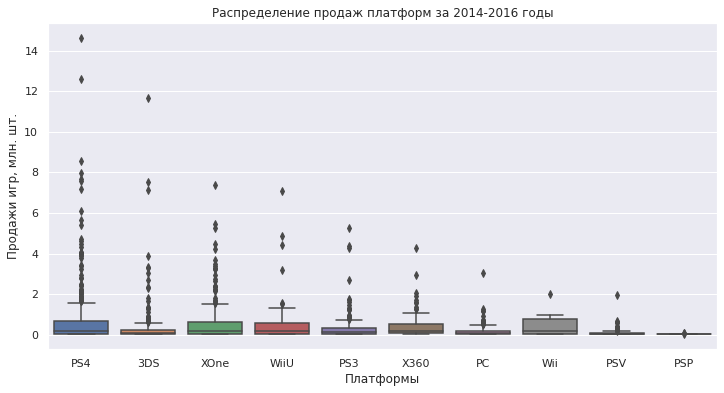

In [31]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=recent_sold_games, x='platform', y='sum_sales')
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж платформ за 2014-2016 годы')
plt.show()

**Добавим масштабированную диаграмму.**

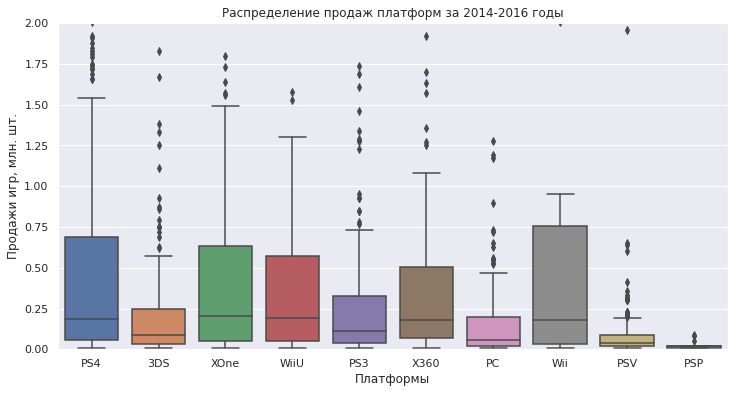

In [32]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=recent_sold_games, x='platform', y='sum_sales')
ax.set_ylim(0, 2)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж платформ за 2014-2016 годы')
plt.show()

**Вывод. Лидер продаж - PS4 - 288.15 миллионов проданных копий. В два раза меньше продаж у модели - XOne - 140.36 миллионов копий. Следующая - 3DS - 86.68 миллионов копий, PS3 - 68.18 миллионов копий, X360 - 48.22 миллионов копий, WiiU - 42.98 миллионов копий, PC - 27.05 миллионов копий и PSV - 22.40 миллионов копий.**

**PS4, XboxOne, WiiU и Wii на текущий момент является наиболее перспективными из представленных, у остальных медиана значительно ниже. Xbox 360 и PS3 были выпущены в 2005 и 2006 годах соответственно, спрос на них будет падать, исходя из среднего срока жизни платформы.**

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы. Соотнесите выводы с продажами игр на других платформах.

In [33]:
def ratio_user_score(game): #создадим функцию для просчёта корреляции от отзывов пользователей
  game.plot.scatter(x = 'user_score', y = 'sum_sales', alpha=0.3)
  plt.title('Зависимость продаж от отзывов пользователей')
  plt.xlabel('Рейтинг пользователей')
  plt.ylabel('Продажи')
  corr = round(game['user_score'].corr(game['sum_sales']), 2)
  result = 'Коэффициент корреляции: ' + str(corr)
  return result

def ratio_critic_score(game): #создадим функцию для просчёта корреляции от отзывов критиков
  game.plot.scatter(x = 'critic_score', y = 'sum_sales', alpha=0.3)
  plt.title('Зависимость продаж от отзывов критиков')
  plt.xlabel('Рейтинг критиков')
  plt.ylabel('Продажи')
  corr = round(game['critic_score'].corr(game['sum_sales']), 2)
  result = 'Коэффициент корреляции: ' + str(corr)
  return result

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Свои функции для выполнения повторяющихся операций - это короткий код и показатель профессионализма. 👍</font>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


'Коэффициент корреляции: -0.04'

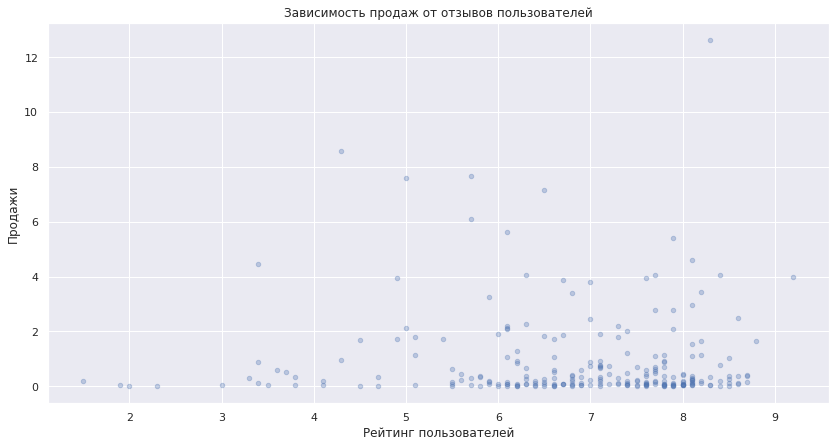

In [34]:
pl_ps4 = recent_sold_games.query('platform == "PS4"')
ratio_user_score(pl_ps4)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


'Коэффициент корреляции: 0.4'

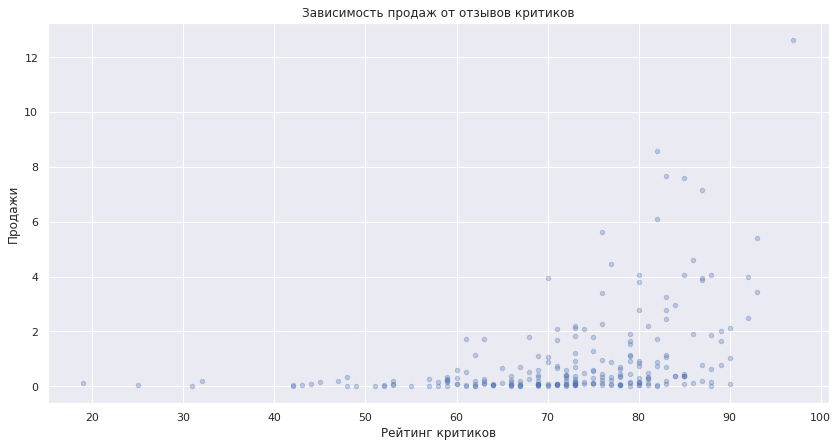

In [35]:
ratio_critic_score(pl_ps4)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


'Коэффициент корреляции: -0.17'

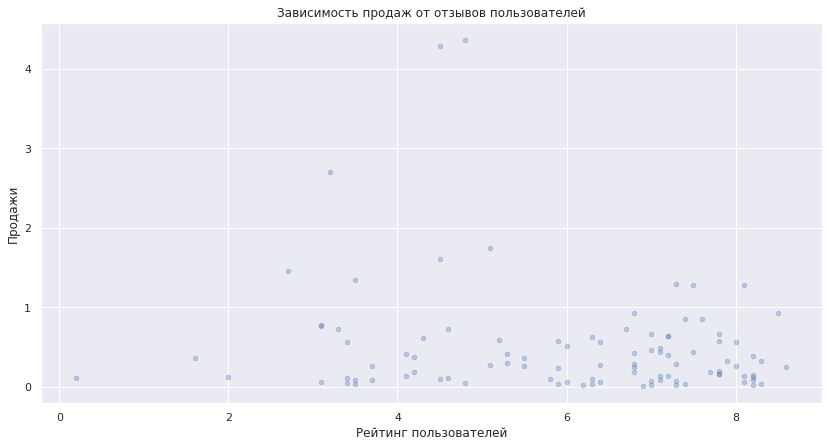

In [36]:
pl_ps3 = recent_sold_games.query('platform == "PS3"')
ratio_user_score(pl_ps3)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


'Коэффициент корреляции: 0.45'

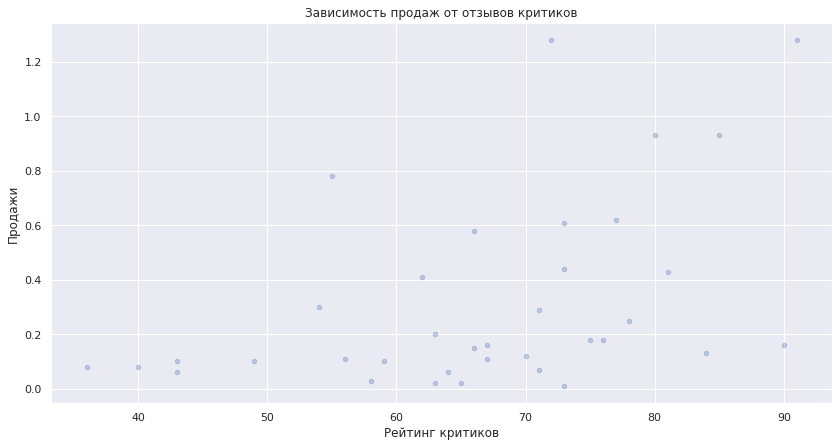

In [37]:
ratio_critic_score(pl_ps3)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


'Коэффициент корреляции: -0.07'

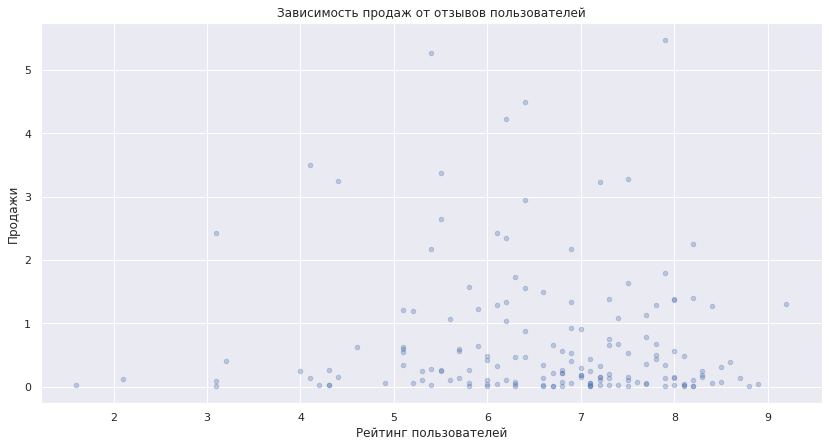

In [38]:
pl_xone = recent_sold_games.query('platform == "XOne"')
ratio_user_score(pl_xone)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


'Коэффициент корреляции: 0.43'

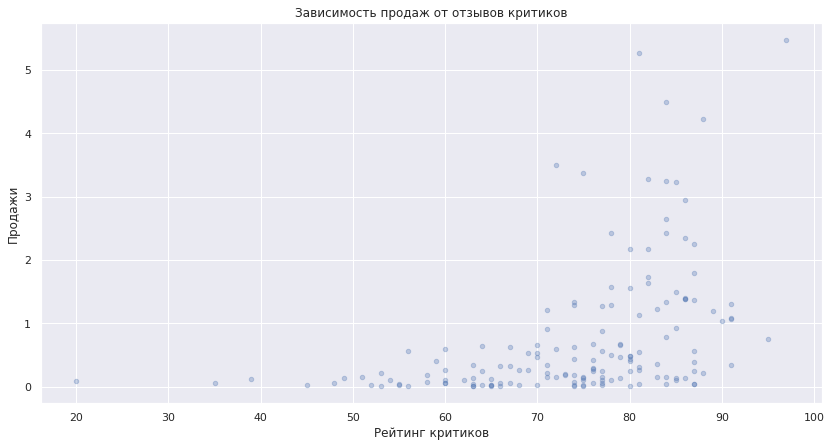

In [39]:
ratio_critic_score(pl_xone)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


'Коэффициент корреляции: 0.22'

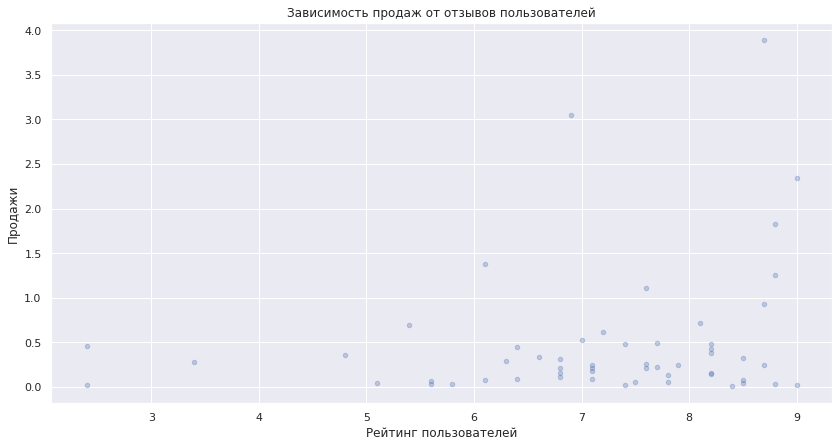

In [40]:
pl_3ds = recent_sold_games.query('platform == "3DS"')
ratio_user_score(pl_3ds)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


'Коэффициент корреляции: 0.31'

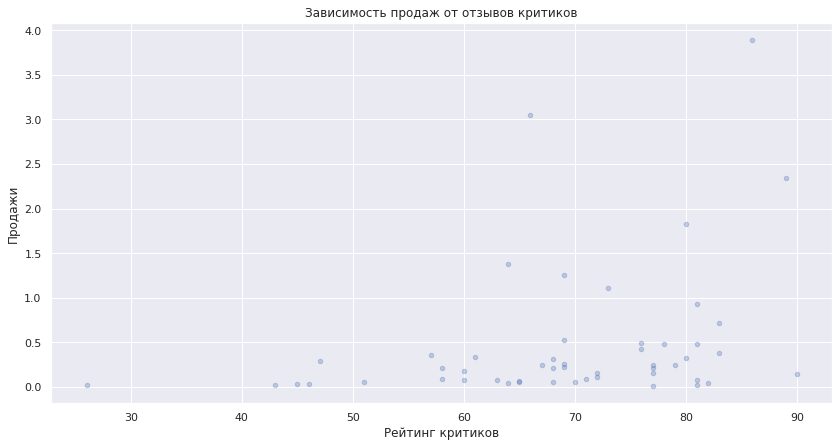

In [41]:
ratio_critic_score(pl_3ds)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


'Коэффициент корреляции: -0.14'

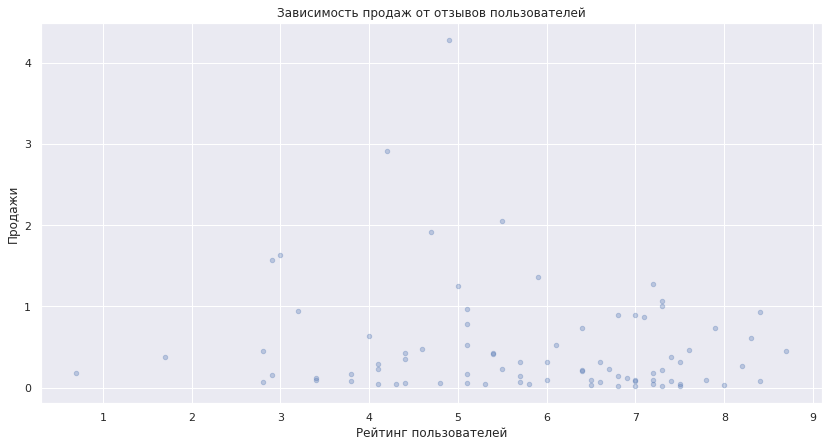

In [42]:
pl_x360 = recent_sold_games.query('platform == "X360"')
ratio_user_score(pl_x360)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


'Коэффициент корреляции: 0.53'

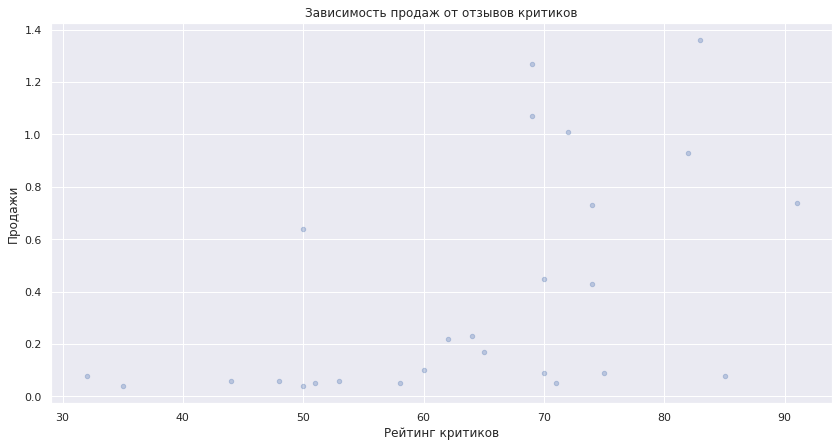

In [43]:
ratio_critic_score(pl_x360)

**Вывод. Оценки критиков имеют значение: повышают шансы на продажу для всех платформ, кроме 3DS, оценки пользователей носят более субъективный характер. На платформе 3DS оценки пользователей влияют на продажи значительно больше. Видим много игр с высокой оценкой критиков, но "низкой" выручкой.**

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

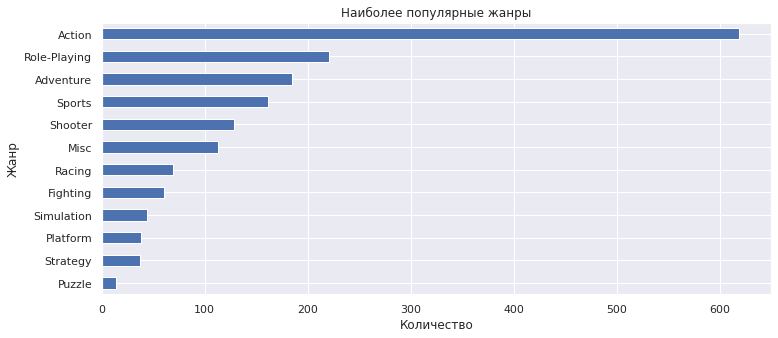

In [44]:
genres = recent_sold_games.groupby('genre')['genre'].count().sort_values(ascending=True) #график по количеству игр
genres.plot(kind='barh', figsize=(12, 5), grid=True, legend=False)
plt.xlabel('Количество')
plt.ylabel('Жанр')
plt.title('Наиболее популярные жанры')
plt.show()

**Наиболее популярные жанры по количеству выпущенных игр - action, role-playing и adventure.**

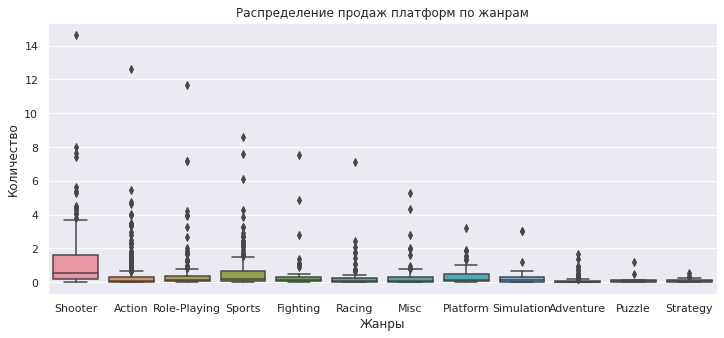

In [45]:
plt.figure(figsize=(12, 5))
ax = sns.boxplot(data=recent_sold_games, x='genre', y='sum_sales') #График по сумме продаж
ax.set_ylabel('Количество')
ax.set_xlabel('Жанры')
ax.set_title('Распределение продаж платформ по жанрам')
plt.show()

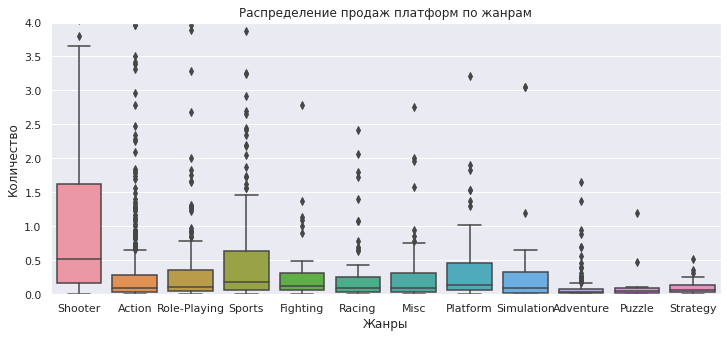

In [46]:
plt.figure(figsize=(12, 5))
ax = sns.boxplot(data=recent_sold_games, x='genre', y='sum_sales') #График по сумме продаж
ax.set_ylim(0, 4)
ax.set_ylabel('Количество')
ax.set_xlabel('Жанры')
ax.set_title('Распределение продаж платформ по жанрам')
plt.show()

**Вывод.
Исходя из полученных данных, видим, что выпуск игр начался с 1980 года, далее идёт рост продаж в середине 90-х годов. Связываю это с развитием технологий и ростом доступности для пользователей. После 2000 года наблюдается резкий рост, это также связываю с развитием технологической отрасли. Пик приходится на 2008-2009 годы, спад после 2010 года связываю с кризисом 2008 года, после которого компании потеряли в финансировании и в качественных кадрах. После кризиса снова видим рост к 2015 году, компании, по-видимому, оправились от последствий и нарастили производство.**
- Лидерами продаж являются все версии PlayStation, xbox 360 от Microsoft, консоли Nintendo - DS и Wii;
- Средний срок жизни платформы - 7 лет;
- Актуальный периодом для дальнейшего исследования - с 2014 по 2016 годы, так как 2-3 года - актуальный срок для прогнозирования;
- Лидеры за актуальный период - это платформы PS4, XboxOne, 3DS, PS3, X360, WiiU, PC и PSV;
- Наиболее потенциально коммерчески успешные платформы: PS4, XboxOne, WiiU и Wii. У остальных медиана значительно ниже;
- Оценки критиков имеют определенное значение, повышают шансы на продажу по всем рассмотренным платформам, в отличие от оценок пользователей; 
- На платформе 3DS оценки пользователей влияют на продажи значительно больше;
- Преобладающие жанры по количеству выпускаемых игр - action, role-playing и adventure;
- Игры в жанрах shooter, sports, action и role-playing приносят наибольшую сумму продаж, медиана у них выше чем у остальных.

### Составьте портрет пользователя каждого региона
  **Определите для пользователя каждого региона (NA, EU, JP).**
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [47]:
top_platforms = recent_sold_games.loc[(recent_sold_games['year_of_release'] >2014)]
top_platforms = platform_sales[:5]
other_sales = platform_sales[5:].sum()

In [48]:
top_platforms = top_platforms.append(other_sales, ignore_index=True)

In [49]:
len(games)

16442

In [50]:
len(recent_sold_games)

1689

In [51]:
def popular_platforms():
    regions = [('na_sales', 'Северной Америке'), ('eu_sales', 'Европе'), ('jp_sales', 'Японии')]
    fig, axes = plt.subplots(1, 3, figsize=(18, 6)) 
    fig.suptitle('Обзор рынка платформ') 
    for i, (region, name) in enumerate(regions):
        x = recent_sold_games.pivot_table(index='platform', values=region, aggfunc='sum')\
                                     .sort_values(ascending=False, by=region)
        platform_sales = x[:5]
        platform_sales.loc[len(platform_sales.index)] = x[5:].sum()
        platform_sales.rename(index={5:"other"}, inplace= True)
        platform_sales.plot(kind='pie', y=region, autopct='%1.1f%%',
                            ax=axes[i], legend=False, title='Популярность платформ в ' + name)
        axes[i].set_ylabel('')
    plt.show()

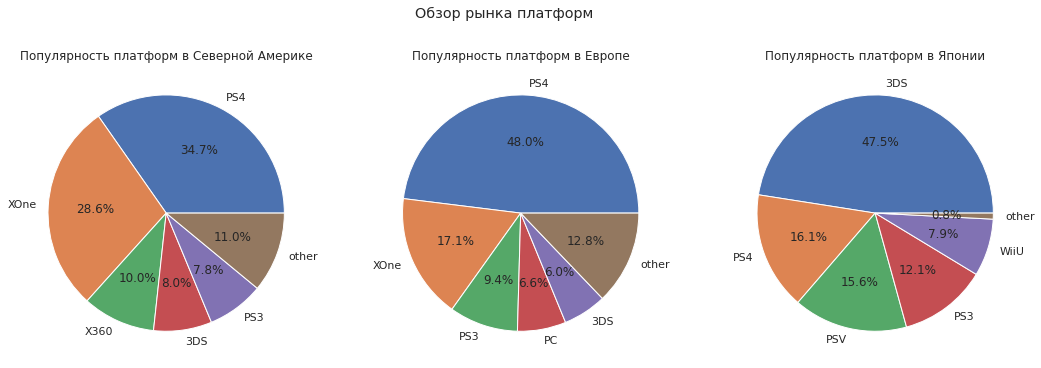

In [52]:
popular_platforms()

**В Северной Америке самые популярные платформы: 1)PS4, 2)XOne, 3)X360, 4)PS3 и 5)3DS;
<br/>В Европе: 1)PS4, 2)PS3, 3)XOne, 4)PC и 5)3DS;
<br/>В Японии: 1)3DS, 2)PS3, 3)PSV, 4)PS4 и 5)WiiU.**

#### Самые популярные жанры (топ-5).

In [53]:
def popular_genre():
    regions = [('na_sales', 'Северной Америке'), ('eu_sales', 'Европе'), ('jp_sales', 'Японии')]
    fig, axes = plt.subplots(1, 3, figsize=(18, 6)) 
    fig.suptitle('Обзор популярных жанров') 
    for i, (region, name) in enumerate(regions):
        x = recent_sold_games.pivot_table(index='genre', values=region, aggfunc='sum')\
                                     .sort_values(ascending=False, by=region)
        platform_sales = x[:5]
        platform_sales.loc[len(platform_sales.index)] = x[5:].sum()
        platform_sales.rename(index={5:"other"}, inplace= True)
        platform_sales.plot(kind='pie', y=region, autopct='%1.1f%%',
                            ax=axes[i], legend=False, title='Популярность жанров в ' + name)
        axes[i].set_ylabel('')
    plt.show()

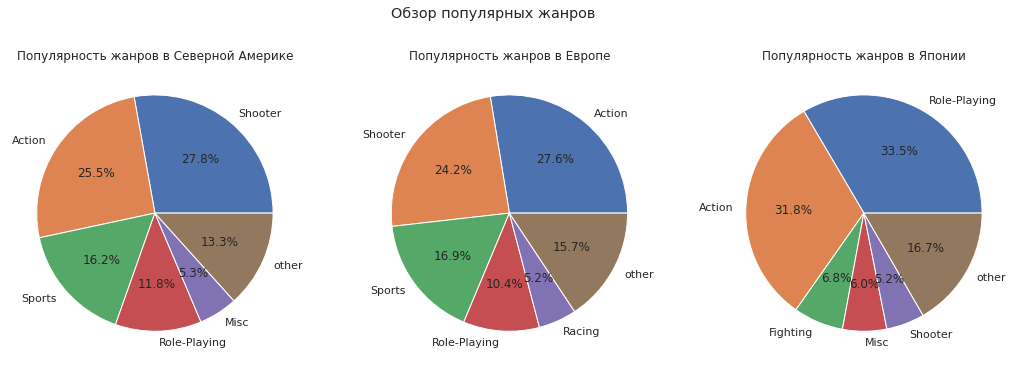

In [54]:
popular_genre()

**В Северной Америке самые популярные жанры: action, shooter, sports, role-playing и misc;
<br/>В Европе картина похожа, но с другим распределением: action, shooter, sports, role-playing и racing;
<br/>В Японии: role-playing, action, misc, fighting и shooter.**

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [55]:
def popular_rating():
    regions = [('na_sales', 'Северной Америке'), ('eu_sales', 'Европе'), ('jp_sales', 'Японии')]
    fig, axes = plt.subplots(1, 3, figsize=(18, 6)) 
    fig.suptitle('Обзор популярных рейтингов') 
    for i, (region, name) in enumerate(regions):
        platform_sales = recent_sold_games.pivot_table(index='rating', values=region, aggfunc='sum')\
                                     .sort_values(ascending=False, by=region)
        platform_sales.plot(kind='pie', y=region, autopct='%1.1f%%',
                            ax=axes[i], legend=False, title='Популярность рейтингов в ' + name)
        axes[i].set_ylabel('')
    plt.show()

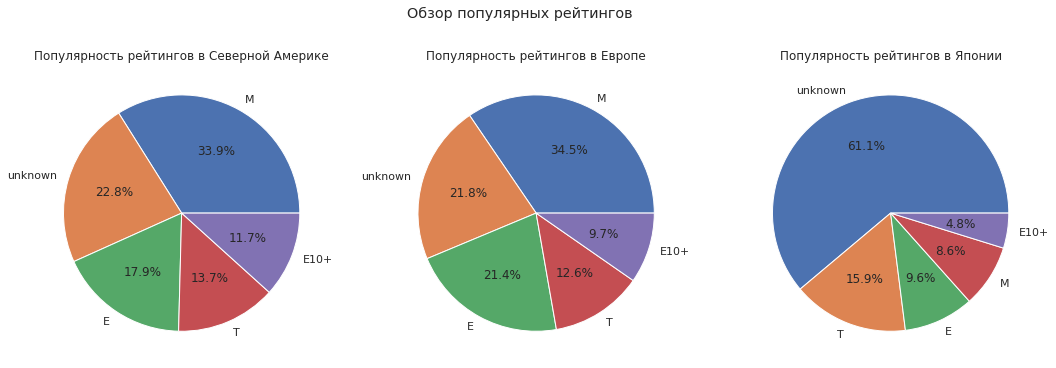

In [56]:
popular_rating()

- Схожие круговые диаграммы в Северной Америке и Европе, на первом месте игры с рейтингом M и E;
- В Японии игры с рейтингом М только на 3 месте, на первых местах T, E и unknown, настолько большое значение продаж безрейтинговых игр это может быть связано со спецификой региона.

**Вывод.**
- Жители американского региона предпочитают PS4, XboxOne, Xbox360, PS3 и 3DS. Наиболее предпочитаемые жанры - action, shooter, sports, role-playing и misc. Рейтинги игр М и Е, М со значительным отрывом.
- Жители европейского региона предпочитают платформу PS4, после PS3, XboxOne, PC и 3DS. Предпочитают следующие жанры: action, shooter, sports, role-playing и racing. Рейтинги игр М и Е, М с большим отрывом.
- ТОП-5 для японцев - это 3DS, далее PS3, PSV, PS4 и WiiU. Наиболее предпочитаемые жанры - role-playing, action, misc, fighting и shooter. Рейтинги игр Т, Е и М.

### Проверим гипотезы

- Т.к. имеем две независимые выборки, воспользуемся t-критерием Стьюдента и проверим равенства средних значений в двух выборках.
- Пороговое значение alpha определим как 0.5 (из двух общепринятых 0.1 и 0.5).

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC равны;
- Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC не равны.
Подробнее о формулировании гипотез [здесь](https://e.vyatsu.ru/pluginfile.php/462632/mod_resource/content/2/Теоретический%20материал__проверка%20статгипотез_пункт%203.6.1.pdf)

In [57]:
alpha = 0.1

results = st.ttest_ind(
    recent_sold_games[recent_sold_games['platform'] == 'PC']['user_score'].dropna(),
    recent_sold_games[recent_sold_games['platform'] == 'XOne']['user_score'].dropna()
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**Не отвергаем нулевую гипотезу о том, что средние рейтинги одинаковы.**

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports равны.
- Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports не равны.

In [58]:
alpha =  0.1

results = st.ttest_ind(
    recent_sold_games[recent_sold_games['genre'] == 'Action']['user_score'].dropna(),
    recent_sold_games[recent_sold_games['genre'] == 'Sports']['user_score'].dropna()
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Отвергаем нулевую гипотезу о том, что средние рейтинги одинаковые. Вероятно, что средние рейтинги жанров будут отличаться.**

**Вывод.**
- Возможно, средние рейтинги платформ Xbox One и PC будут равны.
- Возможно, средние рейтинги жанров Action и Sports будут не равны.

<AxesSubplot:title={'center':'Средние пользовательские оценки по жанрам'}, xlabel='Жанры', ylabel='Оценка'>

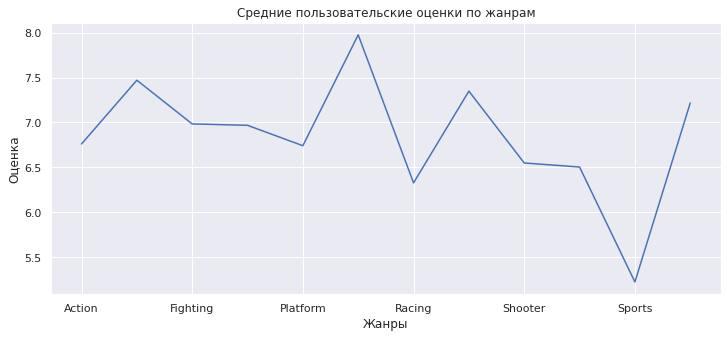

In [59]:
(
recent_sold_games.pivot_table(index='genre', values='user_score', aggfunc='mean')
    .plot(grid='True', title='Средние пользовательские оценки по жанрам', xlabel='Жанры', ylabel='Оценка', legend=False, figsize=(12,5))
)

<AxesSubplot:title={'center':'Средние пользовательские оценки по платформам'}, xlabel='Платформы', ylabel='Оценка'>

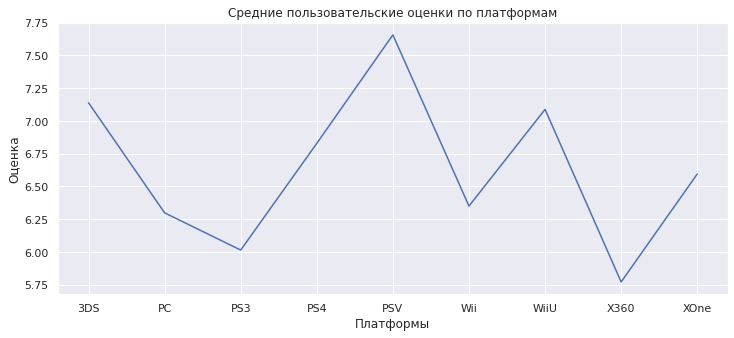

In [60]:
(
recent_sold_games.pivot_table(index='platform', values='user_score', aggfunc='mean')
    .plot(grid='True', title='Средние пользовательские оценки по платформам', xlabel='Платформы', ylabel='Оценка', legend=False, figsize=(12,5))
)

### Общий вывод

**Основной целью исследования Нам нужно было выявить определяющие успешность игры закономерности. Эта информация была необходима для планирования рекламных компаний.
Для исследования были предоставлены данные со следующими описанием:**

Для исследования были предоставлены данные со следующими **описанием**:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Предобработка данных:**
Убрал пропуски, где это было возможно;
Проверил на дубликаты;
Привёл столбцы  'year_of_release' к типу 'int'  и 'user_score' к типу 'float';
Заполнил пропущенные значения рейтингов, как unknown, там где было мало значений - объединил;
Добавил новый столбец с суммой продаж для всех регионов.

**Исследовательский анализ данных:**
Исходя из полученных данных, видим, что выпуск игр начался с 1980 года, далее идёт рост продаж в середине 90-х годов. Связываю это с развитием технологий и ростом доступности для пользователей. После 2000 года наблюдается резкий рост, это также связываю с развитием технологической отрасли. Пик приходится на 2008-2009 годы, спад после 2010 года связываю с кризисом 2008 года, после которого компании потеряли в финансировании и в качественных кадрах. После кризиса снова видим рост к 2015 году, компании, по-видимому, оправились от последствий и нарастили производство.
- Лидерами продаж являются все версии PlayStation, Xbox 360 от Microsoft, консоли Nintendo - DS и Wii;
- Средний срок жизни платформы - 7 лет;
- Актуальный периодом для дальнейшего исследования - с 2014 по 2016 годы, так как 2-3 года - актуальный срок для прогнозирования;
- Лидеры за актуальный период - это платформы PS4, XboxOne, 3DS, PS3, X360, WiiU, PC и PSV;
- Наиболее потенциально коммерчески успешные платформы: PS4, XboxOne, WiiU и Wii. У остальных медиана значительно ниже;
- Оценки критиков имеют определенное значение, повышают шансы на продажу по всем рассмотренным платформам, в отличие от оценок пользователей; 
- На платформе 3DS оценки пользователей влияют на продажи значительно больше;
- Наиболее популярные жанры - action, role-playing и adventure;
- Игры в жанрах shooter, action и role-playing приносят больше продаж.


**Портрет пользователя каждого региона.**
- Жители американского региона предпочитают PS4, XboxOne, Xbox360, PS3 и 3DS. Наиболее предпочитаемые жанры - action, shooter, sports, role-playing и misc. Рейтинги игр М и Е, М со значительным отрывом.
- Жители европейского региона предпочитают платформу PS4, после PS3, XboxOne, PC и 3DS. Предпочитают следующие жанры: action, shooter, sports, role-playing и racing. Рейтинги игр М и Е, М с большим отрывом.
- Японцам больше нравятся 3DS, далее PS3, PSV, PS4 и WiiU. Наиболее предпочитаемые жанры - role-playing, action, misc, fighting и shooter. Рейтинги игр Т, Е и М.




**Проверка гипотез.**
- **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:** Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC равны, возможно, средние рейтинги платформ Xbox One и PC будут одинаковы.
- **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:** Отвергли нулевую гипотезу о том, что средние рейтинги одинаковые. Вероятно, что средние рейтинги жанров будут разные.

**Исходя из исследованных данных выше: следует потратить рекламный бюджет на игры для таких платформ как PS4, XboxOne, в жанрах shooter, action c рейтингом M, наиболее предпочтительный регион - Европа.** 